### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


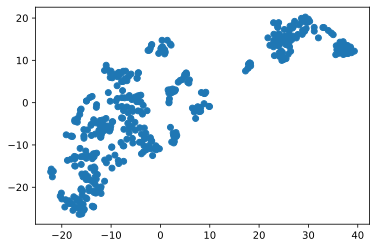

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
%config InlineBackend.figure_format = 'svg'

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=boston.feature_names)
X_test = pd.DataFrame(scaler.transform(X_test), columns=boston.feature_names)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


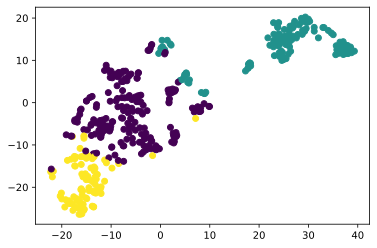

mean CRIM for 0 cluster is -0.3595938819415387
mean CRIM for 1 cluster is 0.8109035550510459
mean CRIM for 2 cluster is -0.3988641865191748

mean price for 0 cluster is 24.958115183246072
mean price for 1 cluster is 16.165354330708666
mean price for 2 cluster is 27.788372093023252


In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans_predict = kmeans.fit_predict(X_train)

plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=kmeans_predict)

plt.show()

print('mean CRIM for 0 cluster is {}'.format(X_train.loc[kmeans_predict == 0, 'CRIM'].mean()))
print('mean CRIM for 1 cluster is {}'.format(X_train.loc[kmeans_predict == 1, 'CRIM'].mean()))
print('mean CRIM for 2 cluster is {}\n'.format(X_train.loc[kmeans_predict == 2, 'CRIM'].mean()))

print('mean price for 0 cluster is {}'.format(y_train.loc[kmeans_predict == 0, 'price'].mean()))
print('mean price for 1 cluster is {}'.format(y_train.loc[kmeans_predict == 1, 'price'].mean()))
print('mean price for 2 cluster is {}'.format(y_train.loc[kmeans_predict == 2, 'price'].mean()))


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.



In [59]:
y_pred = kmeans.predict(X_test)

print('mean CRIM for 0 cluster is {}'.format(X_test.loc[y_pred == 0, 'CRIM'].mean()))
print('mean CRIM for 1 cluster is {}'.format(X_test.loc[y_pred == 1, 'CRIM'].mean()))
print('mean CRIM for 2 cluster is {}\n'.format(X_test.loc[y_pred == 2, 'CRIM'].mean()))

print('mean price for 0 cluster is {}'.format(y_test.loc[y_pred == 0, 'price'].mean()))
print('mean price for 1 cluster is {}'.format(y_test.loc[y_pred == 1, 'price'].mean()))
print('mean price for 2 cluster is {}'.format(y_test.loc[y_pred == 2, 'price'].mean()))

mean CRIM for 0 cluster is -0.3771458000659118
mean CRIM for 1 cluster is 0.7396611726050218
mean CRIM for 2 cluster is -0.40016218898562156

mean price for 0 cluster is 21.860784313725492
mean price for 1 cluster is 16.437142857142856
mean price for 2 cluster is 31.35
